<a href="https://colab.research.google.com/github/himaja-56/VRSU/blob/main/VRSU_EdgeDetectionProgram3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

03-01-2026

Saving chessedgedetection.jpg to chessedgedetection.jpg


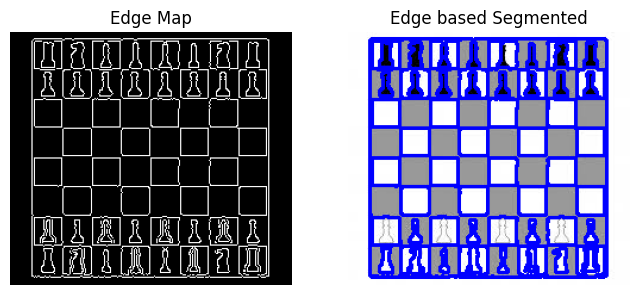

In [1]:
#Edge detection for image segmentation
import cv2
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]
#read img in greyscale
img = cv2.imread(image_path,0)
img_1= cv2.imread(image_path)
img_rgb=cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
if img is None:
  raise ValueError("Image not found")
#edge detection
edges = cv2.Canny(img,100,200)
#find counters
counters, _ = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#convert to colour to draw counters
segmented = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
#draw counters
cv2.drawContours(segmented,counters,-1,(0,0,255),2)
#display
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Edge Map")
plt.imshow(edges, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Edge based Segmented")
plt.imshow(segmented, cmap='gray')
plt.axis("off")

plt.show()

Saving chessedgedetection.jpg to chessedgedetection (1).jpg


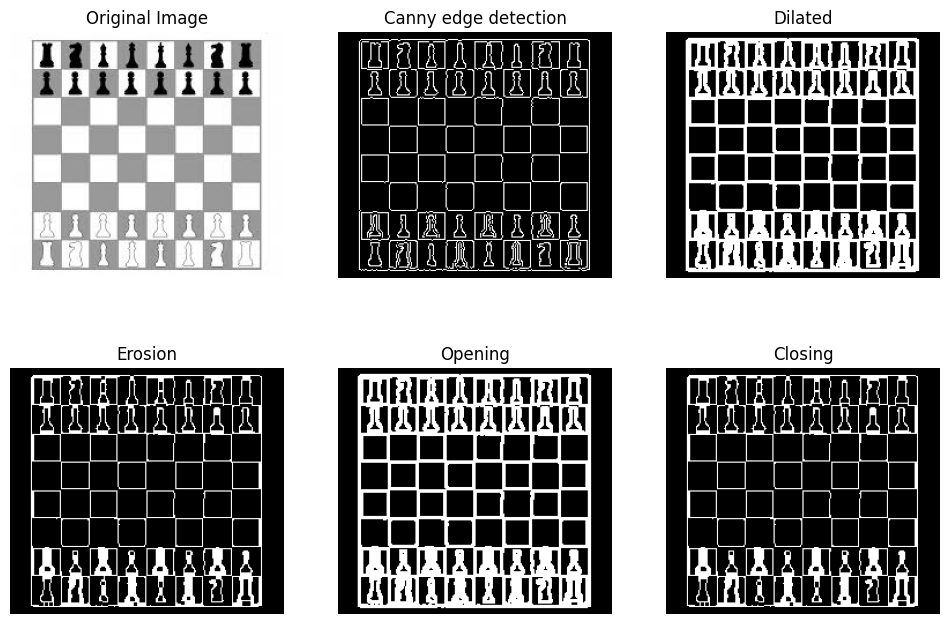

In [2]:
#morphological operations-process images based on shape and structure
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]
#read image in grayscale
img = cv2.imread(image_path,0)
img_1= cv2.imread(image_path)
img_rgb=cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
#2.edge detection canny
edges = cv2.Canny(img,100,200)
#3.create structure element
kernel = np.ones((3,3),np.uint8)
#4.Morphological operations
#dilation -thickens edges
dilated=cv2.dilate(edges,kernel,iterations=1)
#erosion -thinens edges
eroded=cv2.erode(dilated,kernel,iterations=1)
#opening-erosion followed by dilation
opening=cv2.morphologyEx(dilated,cv2.MORPH_OPEN,kernel)
#closing-dilation followed by erosion
closing=cv2.morphologyEx(edges,cv2.MORPH_CLOSE,kernel)
#display
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(2,3,2)
plt.title("Canny edge detection")
plt.imshow(edges, cmap='gray')
plt.axis("off")

plt.subplot(2,3,3)
plt.title("Dilated")
plt.imshow(dilated, cmap='gray')
plt.axis("off")

plt.subplot(2,3,4)
plt.title("Erosion")
plt.imshow(eroded, cmap='gray')
plt.axis("off")

plt.subplot(2,3,5)
plt.title("Opening")
plt.imshow(opening, cmap='gray')
plt.axis("off")

plt.subplot(2,3,6)
plt.title("Closing")
plt.imshow(closing, cmap='gray')
plt.axis("off")

plt.show()